Imports

In [2]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.callbacks as callback

In [3]:
train = pd.read_csv("Music_Genre_Classification_train.csv")
test = pd.read_csv("Music_Genre_Classification_test.csv")
train = train.dropna()
test = test.dropna()

In [4]:
train

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,hiphop.00065.4.wav,66149,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,2726.496978,230626.501970,...,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213,hiphop
8987,classical.00065.4.wav,66149,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,1396.738918,95543.330422,...,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903,classical
8988,country.00044.3.wav,66149,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,2714.346339,110427.695082,...,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389,country
8989,blues.00013.3.wav,66149,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,1800.824216,65413.553514,...,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149,blues


In [5]:
test

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,66149,0.505255,0.074717,0.163630,0.002874,2400.403484,1.214451e+06,2504.768745,435455.640703,5095.915340,...,29.514904,-1.596965,31.212914,-3.638656,47.814972,-3.374476,35.619240,-2.141776,35.706924,4583
995,66149,0.441788,0.075458,0.126057,0.000848,2404.319614,1.693728e+05,2143.263729,76004.150528,4809.109638,...,30.936512,-8.983166,30.758400,4.631423,41.145515,-0.982899,33.679554,-3.411500,34.778164,6045
996,66149,0.209669,0.092197,0.045615,0.000233,2513.444580,1.737489e+04,1817.437810,12717.031917,4316.744666,...,26.008801,15.927879,27.391308,17.862923,38.844635,-11.587505,91.164101,-9.533628,79.951431,1897
997,66149,0.393056,0.079578,0.077266,0.000418,1965.229089,1.048652e+05,2072.314035,62326.933871,4110.771297,...,18.690699,-9.599170,22.972540,6.243433,28.810957,-7.491454,27.324255,0.586015,32.044926,3565


In [7]:
train.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

Looks like a simple classification problem. Since the given features are extracted from a single sound wave(components, mean, stds), its better to include all the columns than dropping any of those as it make sense to just feed it into the DNN model.

In [8]:
# useless. all have the same length 
train = train.drop(["length"], axis = 1)

Scaling 

In [9]:
# Separate features and labels for both train and test datasets
X_train = train.iloc[:, 1:-1]  # Exclude the filename and label columns
y_train = train['label']

X_test = test.iloc[:, 1:-1]  # Exclude length and id columns
X_id = test["id"] # these ids will be tagged with the predicted labels 

# Perform one-hot encoding for the labels

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the train labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# since our dataset was more skewed than normal, it made more sense to use RobustScaler than MinMaxScaler. 
# Robust Scaler - scales the data based on the median and interquartile range (IQR). 
# ...The median is less sensitive to outliers than the mean, and the IQR is a robust measure of data spread. 
# ...This makes Robust Scaling more resilient to extreme values.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model defining and training (DNN)

In [10]:
# Fit and transform the train labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Define the DNN model
model = keras.Sequential([
    keras.layers.Dense(256, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.1), #to make it better. even though the model can overfit in this case, the dataset given seems to expect overfitting because of lesser instances to train on.
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dropout(0.1), 
    keras.layers.Dense(124, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'), 
    keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer with the number of neurons equal to the number of classes
])

#loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Create an instance of the EarlyStopping callback. We dont want to achieve 100% accuracy. 
#We can still expect a 100% accurate model on train dataset to perform better on test in this case as the dataset is given that way.
#Anyways...
early_stopping = EarlyStopping(monitor='accuracy', patience=5)

# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32,verbose = 1, callbacks = [callback.ReduceLROnPlateau(monitor='loss', patience=10),
                     callback.EarlyStopping(monitor='loss', patience=15, min_delta=1e-4)])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
281/281 [==============================] - 1s 2ms/step - loss: 1.0764 - accuracy: 0.6343 - lr: 0.0010
Epoch 2/100
281/281 [==============================] - 1s 2ms/step - loss: 0.7486 - accuracy: 0.7455 - lr: 0.0010
Epoch 3/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.7957 - lr: 0.0010
Epoch 4/100
281/281 [==============================] - 1s 2ms/step - loss: 0.5091 - accuracy: 0.8276 - lr: 0.0010
Epoch 5/100
281/281 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8589 - lr: 0.0010
Epoch 6/100
281/281 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8769 - lr: 0.0010
Epoch 7/100
281/281 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9009 - lr: 0.0010
Epoch 8/100
281/281 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.9148 - lr: 0.0010
Epoch 9/100
281/281 [==============================] - 1s 2ms/step - loss: 0.2160 - accu

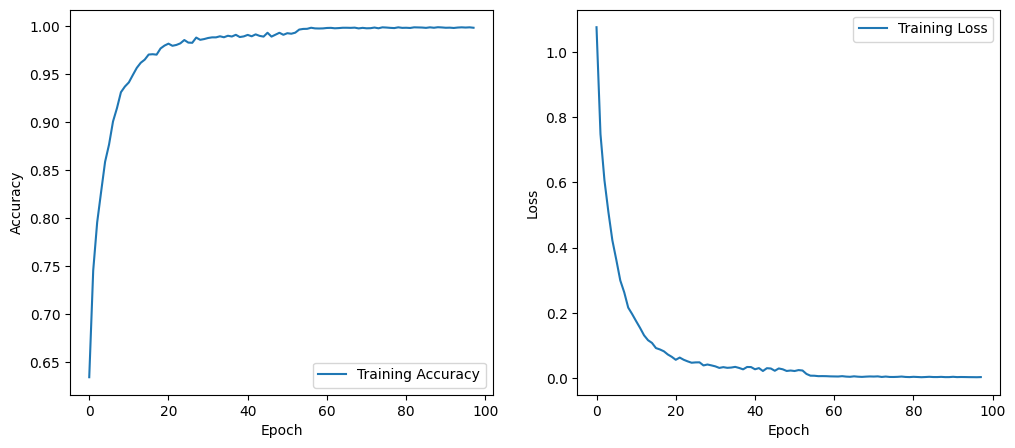

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Predictions

In [12]:
id = X_id[0]

# Use your trained model to make predictions
predictions = model.predict(X_test_scaled)
print(predictions)

32/32 [==============================] - 0s 953us/step
[[3.8449291e-12 5.6132023e-09 4.2420736e-05 ... 1.1011168e-07
  8.0102829e-08 9.9995583e-01]
 [3.6872737e-04 8.3985133e-14 5.2463201e-07 ... 5.4540433e-06
  4.7336973e-05 1.8527280e-05]
 [8.3769880e-11 1.4662249e-10 6.7572643e-07 ... 9.9943745e-01
  5.8030210e-08 5.5991946e-04]
 ...
 [1.9382576e-09 9.9999928e-01 4.2819037e-09 ... 1.6153056e-07
  3.4286812e-10 5.2305829e-12]
 [6.5457535e-11 5.6898872e-09 2.2127842e-09 ... 1.6782735e-10
  1.2109110e-09 1.0697846e-07]
 [2.4822011e-10 6.8960799e-05 2.7007471e-05 ... 2.6637133e-05
  1.9400451e-05 9.3243193e-07]]


In [13]:
# getting the most confident class predicted for each instance on test
final_predictions = []
for i in predictions:
    final_predictions.append(np.argmax(i))

In [14]:
#Tagging each id with its predicted class
sub_df = pd.DataFrame()
id_col = test["id"]
sub_df["id"] = id_col
sub_df["label"] = final_predictions

In [15]:
sub_df.to_csv("music_genre_predictions.csv", index = False)